In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn import datasets

d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


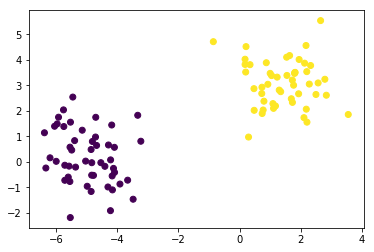

In [4]:
X,y = datasets.make_blobs(centers=2)
plt.scatter(X[:,0],X[:,1],c = y)

In [6]:
X.shape

(100, 2)

In [9]:
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svc = SVC(kernel='linear')

svc.fit(X,y)
w_ = svc.coef_
b_ = svc.intercept_

In [10]:
def fun(x,y):
    return w_[0,0]*x + w_[0,1]*y + b_[0]

In [13]:
# 令函数等于0，就是分界线
# w_[0,0]*x + w_[0,1]*y + b_[0] = 0

# y = -w_[0,0]/w_[0,1]*x -b_[0]/w_[0,1]

w = -w_[0,0]/w_[0,1]
b = -b_[0]/w_[0,1]
print(w,b)

-3.2462825897412566 -3.524047582950306


In [12]:
distance = fun(X[:,0],X[:,1])
distance.sort()
distance

array([-3.16550262, -3.04598583, -3.01115463, -2.93988506, -2.91617522,
       -2.88534061, -2.79523674, -2.79516199, -2.77721869, -2.70019785,
       -2.69586642, -2.62778738, -2.5810027 , -2.5539048 , -2.54602387,
       -2.53364162, -2.51800087, -2.49222928, -2.45318121, -2.40911679,
       -2.4049213 , -2.3573933 , -2.34224612, -2.32579387, -2.29155895,
       -2.23438194, -2.21511184, -2.18638064, -2.15239859, -2.13177986,
       -2.09409418, -2.06992453, -2.05702927, -2.02769954, -2.01657679,
       -2.00497735, -1.97678813, -1.93253996, -1.86067994, -1.8523613 ,
       -1.84763477, -1.83921031, -1.83063925, -1.78231437, -1.6920451 ,
       -1.68344508, -1.66186855, -1.57558508, -1.12553581, -0.9996395 ,
        0.99981978,  0.9998198 ,  1.30119536,  1.411188  ,  1.43373407,
        1.45264235,  1.45358539,  1.47812957,  1.49093818,  1.54858621,
        1.55680509,  1.56971203,  1.60041459,  1.61883454,  1.69157073,
        1.71428823,  1.74709184,  1.75409529,  1.87779464,  1.87

In [15]:
sv_ = svc.support_vectors_
sv_

array([[-3.32612285,  1.82597068],
       [ 0.29289124,  0.97364367],
       [-0.85729423,  4.7074706 ]])

In [22]:
# y = wx + b
# b = y - wx
b1 = sv_[0][1] -w*sv_[0][0]
b2 = sv_[-1][1] -w*sv_[-1][0]

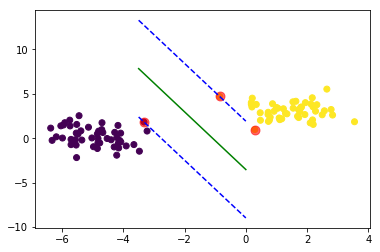

In [23]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.scatter(sv_[:,0],sv_[:,1],color = 'red',s = 80,alpha=0.6)
x = np.linspace(-3.5,0,100)
plt.plot(x,w*x + b,color = 'g')
plt.plot(x,w*x + b1,color = 'blue',ls = '--')
plt.plot(x,w*x + b2,color = 'blue',ls = '--')